<a href="https://colab.research.google.com/github/prinsikakadiya/CodeClause_movieRecommendationSystem/blob/main/movie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [179]:
import pandas as pd

**create dataframe**

In [180]:
moviesDf = pd.read_csv('movies.csv',usecols=['movieId','title'])
moviesDf.head(20)

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
5,6,Heat (1995)
6,7,Sabrina (1995)
7,8,Tom and Huck (1995)
8,9,Sudden Death (1995)
9,10,GoldenEye (1995)


In [181]:
ratingsDf = pd.read_csv('ratings.csv',usecols=['userId','movieId','rating'])
ratingsDf.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [182]:
mergeDf = moviesDf.merge(ratingsDf, on='movieId')
mergeDf.head(500)

,movieId,title,userId,rating
0,1,Toy Story (1995),1,4.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),7,4.5
3,1,Toy Story (1995),15,2.5
4,1,Toy Story (1995),17,4.5
...,...,...,...,...
495,19,Ace Ventura: When Nature Calls (1995),68,1.5
496,19,Ace Ventura: When Nature Calls (1995),91,2.0
497,19,Ace Ventura: When Nature Calls (1995),94,2.0
498,19,Ace Ventura: When Nature Calls (1995),100,1.0


In [183]:
movies2 = mergeDf.sort_values('rating',ascending=False)
movies2.head(5)

,movieId,title,userId,rating
6131,480,Jurassic Park (1993),174,5.0
6926,553,Tombstone (1993),6,5.0
32256,7153,"Lord of the Rings: The Return of the King, The...",106,5.0
7124,587,Ghost (1990),174,5.0
32257,7153,"Lord of the Rings: The Return of the King, The...",112,5.0


**preprocessing**

In [184]:
#number of user IDs that have given a rating of 5
num_users_with_rating_5 = len(movies2[movies2['rating'] == 5.0]['userId'].unique())
num_users_with_rating_5

267

In [185]:
#number of user IDs that have given a rating of 5
num_users_with_rating_1 = len(movies2[movies2['rating'] == 1.0]['userId'].unique())
num_users_with_rating_1

162

In [186]:
#number of user IDs that have given a rating of 5
num_users_with_rating_0 = len(movies2[movies2['rating'] == 0.0]['userId'].unique())
num_users_with_rating_0

0

In [187]:
#number of user IDs that have given a rating of 5
num_users_with_rating_05 = len(movies2[movies2['rating'] == 0.5]['userId'].unique())
num_users_with_rating_05

80

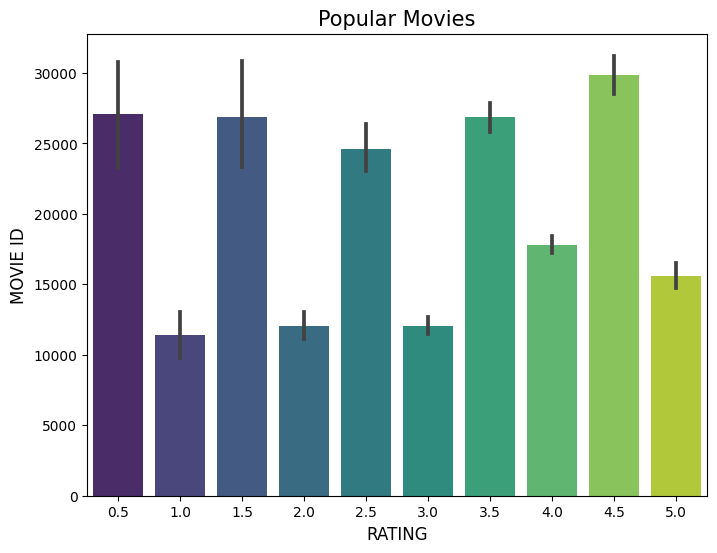

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.barplot(y='movieId',x='rating', data=ratingsDf, palette='viridis')
plt.xlabel("RATING", fontsize=12)
plt.ylabel("MOVIE ID", fontsize=12)
plt.title("Popular Movies", fontsize=15)
plt.show()

In [189]:
moviesDf.shape

(9742, 2)

In [190]:
moviesDf.size

19484

In [191]:
moviesDf.dtypes

movieId     int64
title      object
dtype: object

In [192]:
moviesDf.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [193]:
ratingsDf.shape

(43084, 3)

In [194]:
ratingsDf.size

129252

In [195]:
ratingsDf.dtypes

userId       int64
movieId      int64
rating     float64
dtype: object

In [196]:
ratingsDf.describe()

,userId,movieId,rating
count,43084.000000,43084.000000,43084.000000
mean,145.216206,18582.328103,3.566951
std,85.595025,35281.316493,1.022535
min,1.000000,1.000000,0.500000
25%,68.000000,1090.000000,3.000000
50%,140.000000,2791.000000,4.000000
75%,221.000000,7155.000000,4.000000
max,288.000000,193587.000000,5.000000


<Axes: >

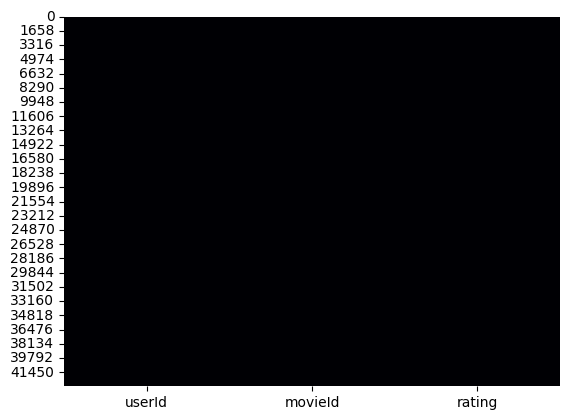

In [197]:
#for null value
import seaborn as sns
sns.heatmap(ratingsDf.isnull(),cmap = 'magma',cbar = False)

<Axes: >

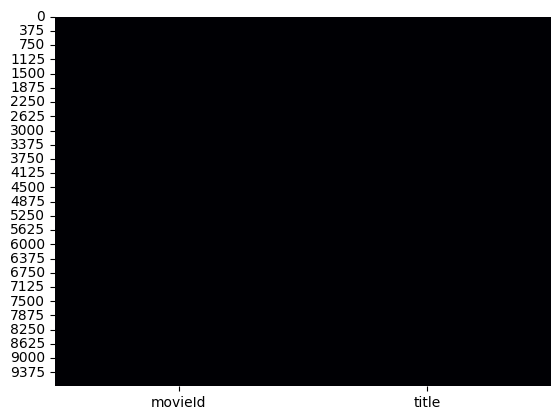

In [198]:
#for null value
import seaborn as sns
sns.heatmap(moviesDf.isnull(),cmap = 'magma',cbar = False)

In [199]:
ratingsDf.isnull().sum()

userId     0
movieId    0
rating     0
dtype: int64

In [202]:
moviesDf.isnull().sum()

movieId    0
title      0
dtype: int64

In [203]:
rating = ratingsDf.pivot(index='movieId',columns='userId',values='rating').fillna(0)
rating.head()

userId,1,2,3,4,5,6,7,8,9,10,...,279,280,281,282,283,284,285,286,287,288
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,3.0,4.5,0.0,4.5,3.0,0.0,0.0,0.0,0.0,4.5
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [204]:
from scipy.sparse import csr_matrix #create a 3 * 3 sparse matrix
mat_rating = csr_matrix(rating.values)

In [205]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(metric = 'cosine',algorithm = 'brute', n_neighbors= 20)
model.fit(mat_rating)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=20)

In [206]:
!pip install fuzzywuzzy


In [207]:
from fuzzywuzzy import process #imported this ai library to fullfill our searching process

In [208]:
# def recommender1(movie_name):
#   idx= process.extractOne(movie_name,moviesDf['title']) [2]
#   print('MOVIE SELECTED: ',moviesDf['title'][idx],'Index: ',idx)

In [209]:
# recommender1('toy story')
# op - MOVIE SELECTED:  Toy Story (1995) Index:  0

In [210]:
def recommender(movie_name,data,n):
  idx= process.extractOne(movie_name,moviesDf['title']) [2]
  print('MOVIE SELECTED: ',moviesDf['title'][idx],'Index: ',idx)
  print('searching for recommendation........')
  distance, indices = model.kneighbors(data[idx],n_neighbors = n)
  #print(distance, indices)
  for i in indices:
    print(moviesDf['title'][i].where(i!=idx))

In [211]:
recommender('toy story',mat_rating,10)

MOVIE SELECTED:  Toy Story (1995) Index:  0
searching for recommendation........
0                                          NaN
548                       Moll Flanders (1996)
487                       War Room, The (1993)
380                      Color of Night (1994)
234         Madness of King George, The (1994)
456                   Romeo Is Bleeding (1993)
2638    Postman Always Rings Twice, The (1981)
2010                           Instinct (1999)
205                      Goofy Movie, A (1995)
860                    Jean de Florette (1986)
Name: title, dtype: object


In [212]:
recommender('Four Rooms',mat_rating,12)

MOVIE SELECTED:  Four Rooms (1995) Index:  17
searching for recommendation........
17                                                    NaN
3516                         Pocketful of Miracles (1961)
2605                                 High Fidelity (2000)
3548                                   Dirty Harry (1971)
5909                              Lords of Dogtown (2005)
1024                                   Blood Beach (1981)
3501      Great Silence, The (Grande silenzio, Il) (1969)
1961                                      eXistenZ (1999)
2850    Everything You Always Wanted to Know About Sex...
2566                   Death Wish 4: The Crackdown (1987)
3617                 Incredible Shrinking Man, The (1957)
3643                                       Topkapi (1964)
Name: title, dtype: object
